# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('D:\\machine learning data sets\\Position_Salaries.csv')

In [3]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


# Feature scaling

In [17]:
# in svm we do feature scaling because it include distance based calculations  so to genra;lise all the features on the same scale we have to do feature scaling it has two types strsndistion and normalization
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [19]:
print(x)
y = y.reshape(len(y),1)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [20]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [21]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [26]:
df1 = np.concatenate((x,y), axis = 1)

df1

array([[-1.5666989 , -0.72004253],
       [-1.21854359, -0.70243757],
       [-0.87038828, -0.66722767],
       [-0.52223297, -0.59680786],
       [-0.17407766, -0.49117815],
       [ 0.17407766, -0.35033854],
       [ 0.52223297, -0.17428902],
       [ 0.87038828,  0.17781001],
       [ 1.21854359,  0.88200808],
       [ 1.5666989 ,  2.64250325]])

# training the model on Support vector machine on whole data set

In [27]:
from sklearn.svm import SVR

In [29]:
regressor = SVR(kernel = 'rbf')
regressor.fit(x,y)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

# predicting the new value based on training model

In [33]:
regressor.predict(sc_x.transform([[6.5]]))

array([-0.27861589])

In [34]:
# through this we will get the scale value of dependent variable to get the exact value of salary we have to apply inverse transformation
sc_y.inverse_transform([-0.27861589])

array([170370.02154356])

In [35]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])))

array([170370.0204065])

# visualising the SVR results

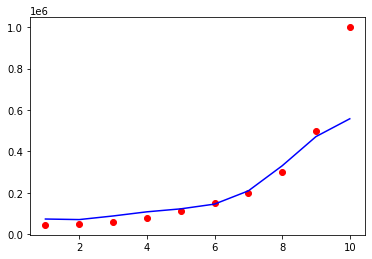

In [43]:
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color = 'red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x)),color = 'blue')